# SENTIMENT ANALYSIS USING VADER, TEXTBLOB AND NLTK

## importing the file

In [3]:
with open("/Users/henryasiamah/Desktop/School Stuff/Computational Linguistics/Mass_shooting/Gun_control/US_Mass_Shooting_Corpus/Bigdata.txt", "r") as f:
    # read the contents of the file
    file_contents = f.read()

# print the contents of the file
print(file_contents[:100])

GUNMAN IN MIAMI KILLS 8 IN RAMPAGE
A man described by neighbors as ''quiet and eccentric'' entered a


In [4]:
#finding the length of the texts

len(file_contents)

251997

## Tokenization, Data Cleaning (Punctuation and Stopword removal)

In [5]:
#Opening_the_file
with open("/Users/henryasiamah/Desktop/School Stuff/Computational Linguistics/Mass_shooting/Gun_control/US_Mass_Shooting_Corpus/Bigdata.txt", "r", encoding="utf-8") as file:
    data=file.read()
    
#Tokenization
import nltk
from nltk import word_tokenize
tokenized_raw_text = nltk.word_tokenize(data)
final_text = nltk.Text(tokenized_raw_text)

#Data Cleaning

#puctuation removed and only alphabatic words kept
final_text_removed_punc=[w.lower() for w in final_text if w.isalpha()]

#stop_word_removed

from nltk.corpus import stopwords

stop_word_removed=[]

for word in final_text_removed_punc:
    if word not in stopwords.words('english'):
        stop_word_removed.append(word)

In [6]:
#finding the length after each section of data cleaning

In [8]:
print('The length of the text after removing stopwords:', len(stop_word_removed))
print('Final text:', len(final_text))
print('Final text after removing punctuations:', len(final_text_removed_punc))

The length of the text after removing stopwords: 22816
Final text: 47326
Final text after removing punctuations: 38845


## Conducting Sentiment Analysis Using TextBlob, Vader and NLTK

In [12]:
# importing libraries for sentiment analysis. 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer, PatternAnalyzer

### TextBlob

In [13]:
#TextBlob for sentiment Analyzing

from textblob import TextBlob

# Define a list of tokens
tokens = stop_word_removed

# Count the number of positive, negative, and neutral tokens
num_pos = 0
num_neg = 0
num_neu = 0

#creating empty list to append 
positive_tokens=[]
negative_tokens=[]
neutral_tokens=[]

for token in tokens:
    blob = TextBlob(token)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        num_pos += 1
        positive_tokens.append(token)
    elif sentiment < 0:
        num_neg += 1
        negative_tokens.append(token)
    else:
        num_neu += 1
        neutral_tokens.append(token)

# Calculate the percentage of positive, negative, and neutral polarity
total = num_pos + num_neg + num_neu
if total == 0:
    print("No sentiment found in the tokens.")
else:
    percent_pos = round(num_pos / total * 100, 2)
    percent_neg = round(num_neg / total * 100, 2)
    percent_neu = round(num_neu / total * 100, 2)

    # Print the percentage of positive, negative, and neutral polarity
    print(f"The tokens have {percent_pos}% positive, {percent_neg}% negative, and {percent_neu}% neutral polarity.")

The tokens have 3.51% positive, 4.52% negative, and 91.97% neutral polarity.


In [17]:
#printing positive words of the TextBlob

#printing positive tokens

print(positive_tokens)

['old', 'calmly', 'apparently', 'first', 'generally', 'general', 'calmly', 'general', 'elementary', 'nearly', 'elementary', 'perfectly', 'elementary', 'high', 'apparently', 'apparently', 'near', 'elementary', 'nearly', 'elementary', 'elementary', 'new', 'latest', 'nearly', 'unique', 'conscious', 'elementary', 'nearly', 'elementary', 'nearly', 'elementary', 'many', 'nearly', 'elementary', 'elementary', 'young', 'many', 'many', 'directly', 'nearly', 'many', 'legally', 'elementary', 'marked', 'free', 'greatest', 'greatest', 'important', 'whole', 'true', 'developed', 'nearly', 'nearly', 'far', 'loudly', 'gay', 'far', 'nearly', 'far', 'nearly', 'new', 'near', 'young', 'gay', 'apparent', 'nearly', 'first', 'first', 'first', 'large', 'far', 'available', 'alive', 'large', 'main', 'nearly', 'high', 'accessible', 'fit', 'fit', 'large', 'many', 'first', 'high', 'high', 'high', 'new', 'young', 'old', 'first', 'right', 'alive', 'live', 'high', 'high', 'high', 'new', 'young', 'first', 'first', 'firs

In [18]:
#finding the number of positive, negative and neutral tokens

print(num_pos,num_neg,num_neu)

800 1031 20985


In [19]:
blob = TextBlob(' '.join(stop_word_removed))
blob.sentiment

Sentiment(polarity=-0.02024858637307697, subjectivity=0.34523595800272344)

In [20]:
#implementing Naive Bayes analyzer with textblob

blob = TextBlob(' '.join(stop_word_removed), analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=1.0, p_neg=2.560999891182086e-292)

## NLTK Sentiment Analyzing 

In [21]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/henryasiamah/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
#NLTK for sentiment Analyzing

from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Join the list of words into a single string
stop_word_removed_str = " ".join(stop_word_removed)

# Analyze the sentiment of the text
sentiment_scores = sia.polarity_scores(stop_word_removed_str)

# Print the sentiment scores
print(sentiment_scores)

{'neg': 0.263, 'neu': 0.656, 'pos': 0.08, 'compound': -1.0}


## NLTK VADER SENTIMENT ANALYSER

In [23]:
#NLTK_Vader for sentiment Analyzing
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Join the list of words into a single string
stop_word_removed_str = " ".join(stop_word_removed)

# Analyze the sentiment of the text
sentiment_scores = sia.polarity_scores(stop_word_removed_str)

# Print the sentiment scores
print(sentiment_scores)

{'neg': 0.263, 'neu': 0.656, 'pos': 0.08, 'compound': -1.0}


## GENERATING WORDCLOUDS

### Wordcloud of the whole text after stopword removal

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_wordcloud(text):
    # create a WordCloud object
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)
    
    # plot the WordCloud image
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    
    # show the plot
    plt.show()

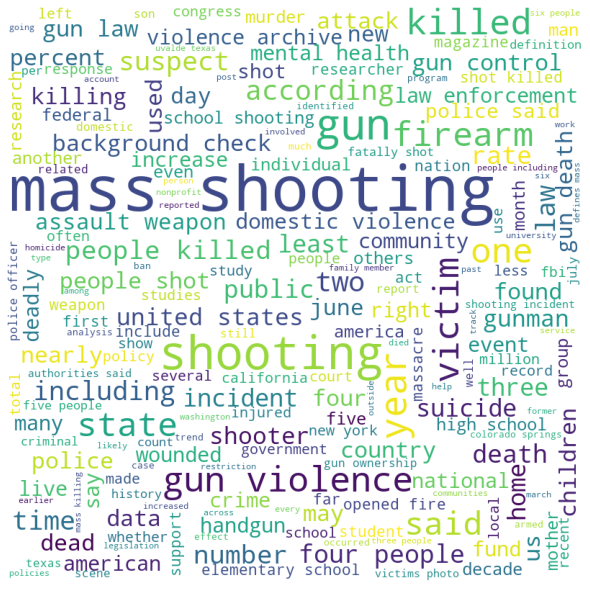

In [25]:
generate_wordcloud(" ".join(stop_word_removed))

## WordCloud of Positive, Negative and Neutral Tokens Based on TextBlob

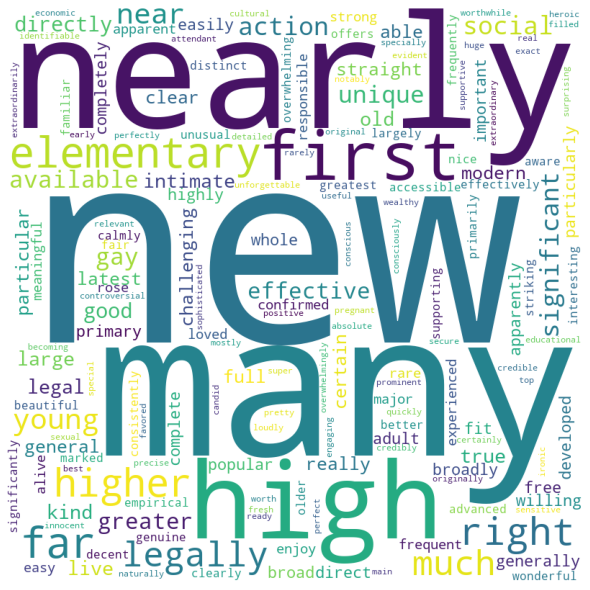

In [26]:
generate_wordcloud(" ".join(positive_tokens))

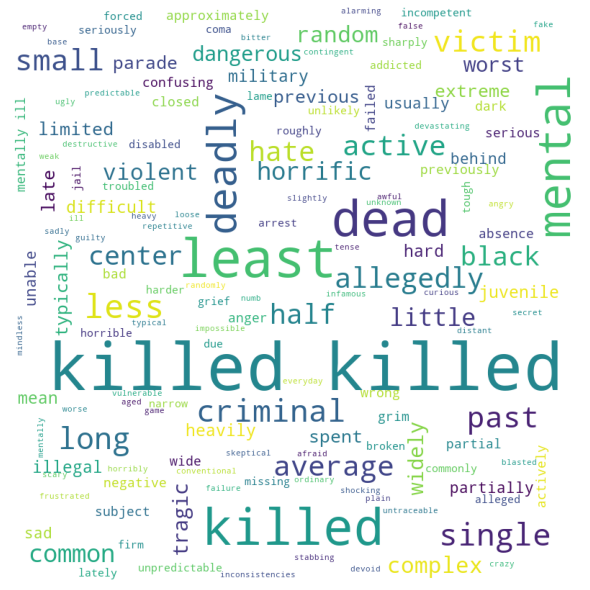

In [27]:
generate_wordcloud(" ".join(negative_tokens))

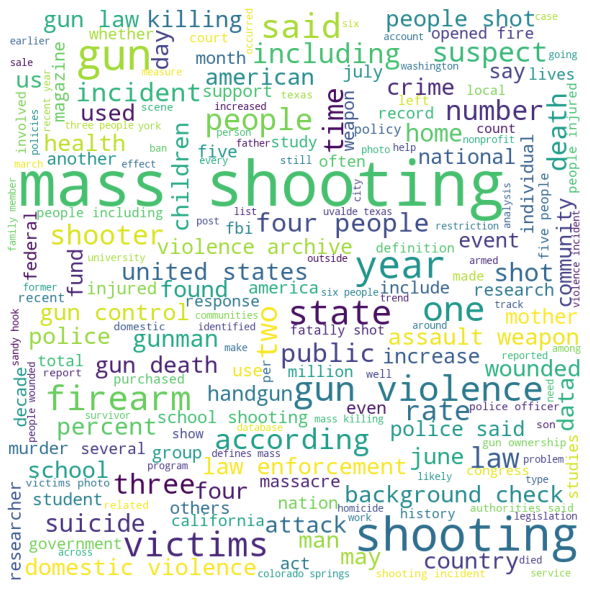

In [28]:
generate_wordcloud(" ".join(neutral_tokens))

In [29]:
# finding words that have a frequncy of 100 and above

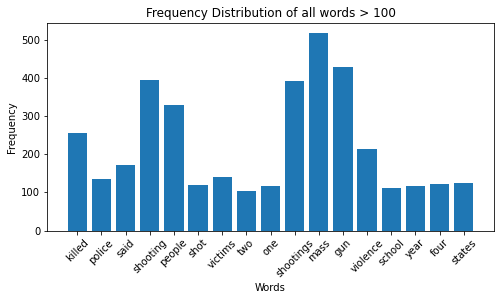

In [30]:
import nltk
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

# Define a list of words


# Use FreqDist to find the frequency distribution
freq_dist = FreqDist(stop_word_removed)

# Create a list of labels and values for words with frequency greater than 1
labels = [word for word, freq in freq_dist.items() if freq > 100 ]
values = [freq for word, freq in freq_dist.items() if freq > 100]

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the bar graph
plt.bar(labels, values)

# Add a title and axis labels
plt.title('Frequency Distribution of all words > 100')
plt.xlabel('Words')
plt.ylabel('Frequency')

# Rotate the x-labels
plt.xticks(rotation=45)

# Adjust the spacing between subplots
plt.subplots_adjust(bottom=0.4)

# Show the graph
plt.show()